In [6]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
from numpy import random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency
from scipy.misc import derivative

from matplotlib import rc
rc('font', family='Malgun Gothic')      #ÌïúÍ∏Ä Ìè∞Ìä∏ÏÑ§Ï†ï
plt.rcParams['axes.unicode_minus']=False      #ÎßàÏù¥ÎÑàÏä§ Î∂ÄÌò∏ Ï∂úÎ†• ÏÑ§Ï†ï

## ÎØ∏Î∂Ñ

ÏµúÏ†ÅÌôîÎ•º ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî ÏûÖÎ†•Í∞íÏù¥ Î≥ÄÌñàÏùÑ Îïå Ìï®ÏàòÏùò Ï∂úÎ†•Í∞íÏù¥ Ïñ¥ÎñªÍ≤å Îã¨ÎùºÏßÄÎäîÏßÄÎ•º Ï†ïÎüâÏ†ÅÏúºÎ°ú ÏïåÏïÑÏïº ÌïòÎ©∞ Ïù¥Îü¨Ìïú Í≥ºÏ†ïÏù¥ ÎØ∏Î∂ÑÏù¥Îã§.

Ìï®ÏàòÏùò Í∑∏ÎûòÌîÑÏÉÅÏóê ÏûàÎäî Ìïú Ï†êÏùÑ Ï§åÏã¨ÏúºÎ°ú Í∑∏ÎûòÌîÑÎ•º Î¨¥ÌïúÌûà ÌôïÎåÄÌï¥ Î≥¥Î©¥ Í∑∏ÎûòÌîÑÏùò Î™®ÏñëÏù¥ ÏßÅÏÑ†Ïóê Í∞ÄÍπåÏõåÏßÄÎäîÎç∞ Ïù¥ÎïåÏùò Í∏∞Ïö∏Í∏∞Î•º ÎØ∏Î∂ÑÏù¥ÎùºÍ≥† ÌïúÎã§. Ïù¥ ÏßÅÏÑ†ÏùÄ Í∞ôÏùÄ Ï†êÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∑∏Î¶∞ Í∑∏ÎûòÌîÑÏùò Ï†ëÏÑ†Í≥º Í∞ôÎã§.

Ïã†Í≤ΩÎßùÏóêÏÑú ÎØ∏Î∂ÑÏùò ÌïÑÏöîÏÑ± : https://gggggeun.tistory.com/120           https://gggggeun.tistory.com/121

ÎØ∏Î∂Ñ Í∞úÎÖê : https://www.youtube.com/watch?v=kMZ3RJEaLE4


- Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏóêÏÑú ÎØ∏Î∂ÑÏùÄ Ïôú ÌïÑÏöîÌïúÍ∞Ä?
    - ÎØ∏Î∂ÑÏúºÎ°ú ÏàúÍ∞ÑÎ≥ÄÌôîÏú®ÏùÑ Ïïå Ïàò ÏûàÎäîÎç∞ Ïù¥Î•º ÏïåÎ©¥ Ïñ¥Îäê Î∞©Ìñ•ÏúºÎ°ú Í∞ÄÎäîÏßÄ Ïïå Ïàò ÏûàÏùå. Ïù¥ Í∏∞Ïö∏Í∏∞Í∞Ä Î∞îÎ°ú Í∞ÄÏ§ëÏπò. Î®∏Ïã†Îü¨ÎãùÍ≥º Îî•Îü¨ÎãùÏóêÏÑú Í∞ÄÏ§ëÏπòÎ•º Íµ¨Ìï¥Ïïº ÌïòÍ∏∞Ïóê ÌïÑÏöîÌï®


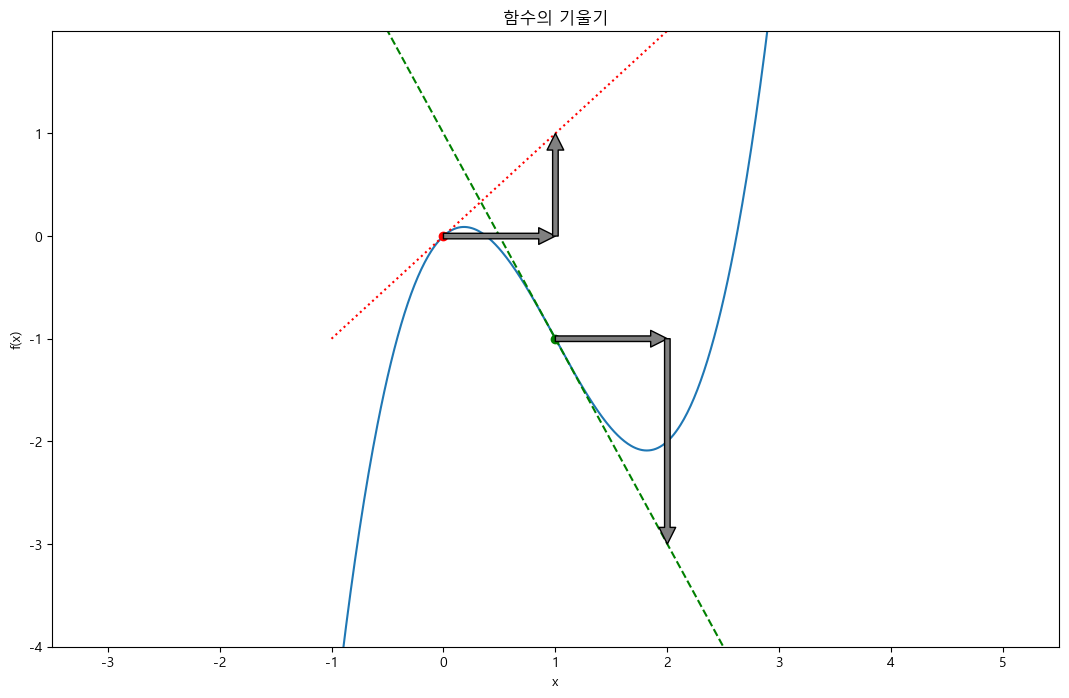

In [3]:
def f(x):
    return x**3 - 3 * x**2 + x     # Ìï®Ïàò Ï†ïÏùò. xÍ∞íÏùÑ ÏûÖÎ†•Î∞õÏïÑ f(x), Ìï®ÏàòÏùò Í≤∞Í≥ºÍ∞íÏùÑ Î∞òÌôò

x = np.linspace(-1, 3, 400)         # -1 Î∂ÄÌÑ∞ 3ÍπåÏßÄ 400Í∞úÏùò ÎèôÏùºÌïú Í∞ÑÍ≤©ÏúºÎ°ú ÎÇòÎàà Í∞íÎì§ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ìï®ÏàòÏùò Í≤∞Í≥ºÍ∞í yÏóê Ìï†Îãπ
y = f(x)

plt.figure(figsize=(13,8))
plt.plot(x, y)
plt.plot(0, 0, 'ro')                #  (0, 0) Ï¢åÌëúÏóê Îπ®Í∞ÑÏÉâ(red) ÏõêÌòï(o) ÎßàÏª§Î•º Í∑∏Î¶¨Îäî ÏΩîÎìú
plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go')
plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--') 
#  x Ï¢åÌëúÎ•º x, y Ï¢åÌëúÎ•º (3*1**2-6*1+1)*(x-1)-1ÏúºÎ°ú ÌïòÎäî Ï†êÎì§ÏùÑ Í∑∏ÎûòÌîÑ ÏÉÅÏóê Ï¥àÎ°ùÏÉâ(green) Ï†êÏÑ†(--, dashed)ÏúºÎ°ú Í∑∏Î¶¨Îäî ÏΩîÎìú

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))    # xÏ∂ïÏùò ÎààÍ∏à
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Ìï®ÏàòÏùò Í∏∞Ïö∏Í∏∞")
plt.show()

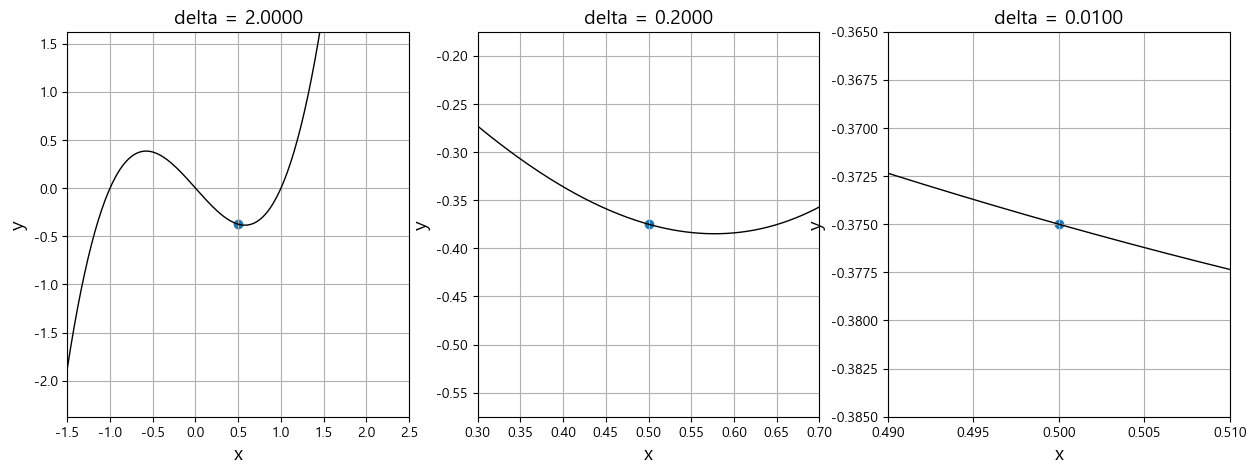

In [10]:
def f(x):
    return(x**3 - x)

plt.figure(figsize=(15, 5))
delta = [2.0, 0.2, 0.01]

x = np.linspace(0.5-delta[0], 0.5+delta[0], 200)
y = f(x)

plt.subplot(131)

plt.ylim(-3.0/8.0-delta[0], -3.0/8.0+delta[0])
plt.xlim(0.5-delta[0], 0.5+delta[0])
plt.plot(x, y, 'b-', lw=1, c='k')                 # 'b-'Îäî ÌååÎûÄÏÉâ ÏÑ†ÏùÑ ÏùòÎØ∏ÌïòÎ©∞, lw=1, c='k'Îäî ÏÑ†Ïùò ÍµµÍ∏∞Î•º 1Î°ú, ÏÉâÏùÑ Í≤ÄÏ†ïÏÉâ
plt.scatter([0.5], [-3.0/8.0])                    # xÍ∞íÏù¥ 0.5, yÍ∞íÏù¥ -3.0/8.0Ïù∏ Ï†êÏùÑ Í∑∏Î¶¨Îäî ÏΩîÎìú
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()                                         # Í∑∏ÎûòÌîÑÏóê Í≤©ÏûêÎ•º Í∑∏Î¶¨Îäî ÏΩîÎìú
plt.title('delta = %.4f' % delta[0], fontsize=14)


x = np.linspace(0.5-delta[1], 0.5+delta[1], 200)
y = f(x)

plt.subplot(132)

plt.ylim(-3.0/8.0-delta[1], -3.0/8.0+delta[1])
plt.xlim(0.5-delta[1], 0.5+delta[1])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[1], fontsize=14)

x = np.linspace(0.5-delta[2], 0.5+delta[2], 200)
y = f(x)

plt.subplot(133)

plt.ylim(-3.0/8.0-delta[2], -3.0/8.0+delta[2])
plt.xlim(0.5-delta[2], 0.5+delta[2])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[2], fontsize=14)

plt.show()

### Ï†ëÏÑ†Ïùò Î∞©Ï†ïÏãù

- Ìï®Ïàò f(x)ÏóêÏÑú xÏùò Í∞íÏùÑ dxÎßåÌÅº Î≥ÄÌôîÏãúÏº∞ÏùÑ Îïå f(x)Ïùò Î≥ÄÌôîÎüâ (f(x+dx)-f(x))Îäî f'(x)dxÏôÄ Í∞ôÎã§.
- ÎØ∏Î∂Ñ : y=f(x)ÎùºÎäî Í∑∏ÎûòÌîÑÏÉÅÏùò Ï†ê(a,f(a))Í∞Ä ÏûàÏùÑ Îïå Í∑∏ Ï†êÏóêÏÑú Í∑∏ÏùÄ Ï†ëÏÑ†Ïùò Í∏∞Ïö∏Í∏∞Îäî f'(a)Ïù¥Î©∞ aÏóêÏÑúÏùò ÏàúÍ∞Ñ Î≥ÄÌôîÏú®ÏùÑ ÏùòÎØ∏
- Ï†ÅÎ∂Ñ : ÎèÑÌï®Ïàò f'(x)Ïùò ÌïòÎ∞© Î©¥Ï†ÅÏùÄ Ïõê Ìï®Ïàò f(x)Ïùò yÏùò Í∞íÏù¥Îã§. ex) f(x) = $x^2$

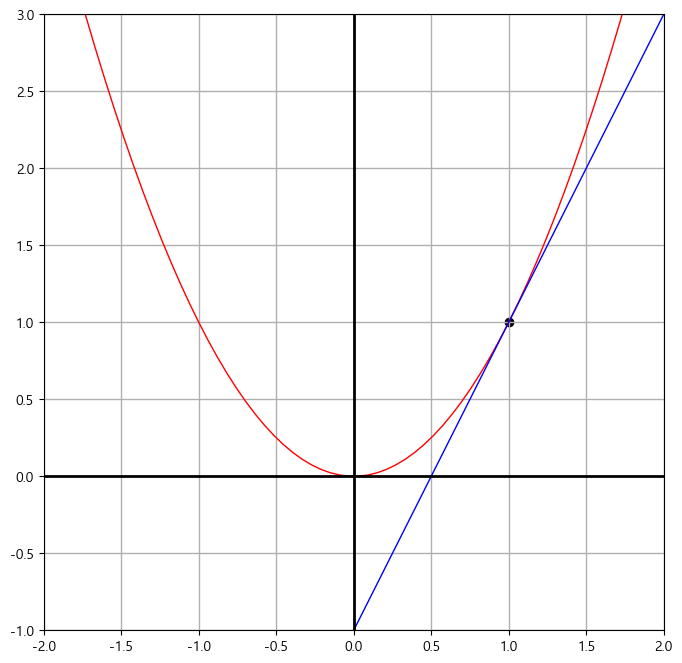

In [5]:
def f(x):
    return (x**2)
def g(x):
    return (2*x -1)

x = np.linspace(-3,3,100)
fig = plt.figure(figsize=(8,8))
plt.scatter([1],[1], c='k')   # Ï†ëÏ†êÏóê Ï†ê Ï∞çÍ∏∞

plt.plot(x, f(x), 'r-', lw=1)    # f(x) = ùë•2
plt.plot(x, g(x), 'b-', lw=1)    # y = 2x-1

plt.plot([x.min(), x.max()], [0,0], lw=2, c='k')    # xÏ∂ï
plt.plot([0,0], [g(x).min(), f(x).max()], lw=2, c='k')    # yÏ∂ï

plt.xlim(-2,2)
plt.ylim(-1,3)
plt.grid(lw=1)
plt.show()

In [6]:
from scipy.misc import derivative   #ÎèÑÌï®Ïàò: Ìï®ÏàòÏùò Î≥ÄÌôîÏú®ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Ìï®Ïàò
print(derivative(f, 1, dx=1e-6))   #Í≥ÑÏÇ∞Ìï† Ìï®Ïàò, xÍ∞í, Ï†ïÌôïÎèÑ Î≥¥Ï†ï(Í∏∞Î≥∏Í∞í: 1e-6/ ÏûëÏùÑÏàòÎ°ù Ï†ïÌôï)
print(derivative(f, 2, dx=1e-6))

2.000000000002
4.000000000115023


#### Ìé∏ÎØ∏Î∂Ñ
- Îã§Î≥ÄÏàò Ìï®ÏàòÏóêÏÑú Ìïú Î≥ÄÏàòÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÎì§Ïùò Í∞íÏùÑ Í≥†Ï†ïÌïòÍ≥†, Ìï¥Îãπ Î≥ÄÏàòÏùò Î≥ÄÌôîÏóê Îî∞Î•∏ Ìï®ÏàòÍ∞íÏùò Î≥ÄÌôîÎüâÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Í∞úÎÖê

In [4]:
import sympy
sympy.init_printing(use_latex='mathjax')
# Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú ÏàòÌïôÏãùÏùò LaTeX ÌëúÌòÑÏùÑ ÏúÑÌï¥ ÌïÑÏöîÌï®

x,y = sympy.symbols('x y')
x

x

In [3]:
f = (x**2) + (4*x*y) + (4*y**2)   
f        # Î≥ÄÏàòÎ•º ÏàòÌïôÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî Í∏∞Ìò∏Îì§Î°ú Ïç®Ï§å

 2              2
x  + 4‚ãÖx‚ãÖy + 4‚ãÖy 

In [9]:
# diff() Ìï®ÏàòÎ°ú ÎØ∏Î∂Ñ, Î≥ÄÏàò, ÏÉÅÏàòÎ•º Íµ¨Î∂ÑÌïòÍ∏∞ ÏúÑÌïòÏó¨ Ìé∏ÎØ∏Î∂ÑÏù∏ Í≤ÉÏ≤òÎüº ÏûÖÎ†•Î≥ÄÏàò ÏßÄÏ†ï
print(sympy.diff(f, x))    # xÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ìé∏ÎØ∏Î∂Ñ
sympy.diff(f, y)    # yÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ìé∏ÎØ∏Î∂Ñ

2*x + 4*y


4‚ãÖx + 8‚ãÖy

## Ï†ÅÎ∂Ñ
- Ï†ÅÎ∂ÑÏùÄ ÎØ∏Î∂ÑÍ≥º Î∞òÎåÄÎêòÎäî Í∞úÎÖê. Î∂ÄÏ†ïÏ†ÅÎ∂ÑÍ≥º Ï†ïÏ†ÅÎ∂ÑÏù¥ ÏûàÎã§.
 - Î∂ÄÏ†ïÏ†ÅÎ∂ÑÏùÄ Ï†ïÌôïÌïòÍ≤å ÎØ∏Î∂ÑÍ≥º Î∞òÎåÄÎêòÎäî Í∞úÎÖê. Ï¶â Î∞ò ÎØ∏Î∂ÑÏù¥Îã§. Ïñ¥Îñ§ Ìï®ÏàòÎ•º ÎØ∏Î∂ÑÌïòÏó¨ ÎÇòÏò® Í≤∞Í≥ºÏù∏ ÎèÑÌï®ÏàòÎùºÍ≥† Í∞ÄÏ†ïÌïòÍ≥† Ïù¥ ÎèÑÌï®Ïàò f(x)Ïóê ÎåÄÌïú ÎØ∏Î∂ÑÎêòÍ∏∞ Ï†ÑÏùò ÏõêÎûòÏùò Ìï®ÏàòÎ•º Ï∞æÎäî Í≥ºÏ†ï ÎòêÎäî Í∑∏ Í≤∞Í≥ºÎ•º ÏùòÎØ∏
 - Ï†ïÏ†ÅÎ∂ÑÏùÄ ÎèÖÎ¶ΩÎ≥ÄÏàò xÍ∞Ä Ïñ¥Îñ§ Íµ¨Í∞Ñ [a,b] ÏÇ¨Ïù¥Ïùº Îïå Í∑∏ Íµ¨Í∞ÑÏóêÏÑú Ìï®Ïàò f(x)Ïùò Í∞íÍ≥º ÏàòÌèâÏÑ†(xÏ∂ï)Ïù¥ Ïù¥Î£®Îäî Î©¥Ï†ÅÏùÑ Íµ¨ÌïòÎäî ÌñâÏúÑ ÌòπÏùÄ Í∑∏ Í∞íÏùÑ ÏùòÎØ∏
 
Ï†ÅÎ∂ÑÏùò Í∞úÎÖê : https://www.youtube.com/watch?v=kV2j3S5qBm4

ÎØ∏Î∂ÑÍ≥º Ï†ÅÎ∂ÑÏùò Í¥ÄÍ≥Ñ : https://www.youtube.com/watch?v=xAAAvj7bmKQ

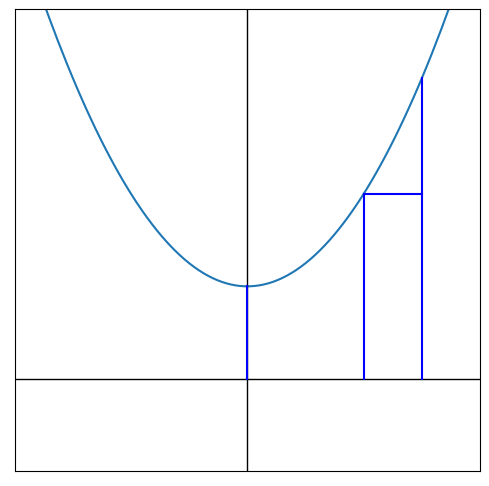

In [7]:
def f(x) :
    return x**2 + 1
xx = np.linspace(-4.0, 4.0, 200)
yy = f(xx)

plt.figure(figsize=(6,6))
plt.xlim(-2,2)
plt.ylim(-1,4)
plt.plot(xx, yy)
plt.plot([-2,2],[0,0],c='k',lw=1)
plt.plot([0,0],[-1,4],c='k',lw=1)
plt.plot([0,0],[0,f(0)],c='b')
plt.plot([1,1],[0,f(1)],c='b')
plt.plot([1.5,1.5],[0,f(1.5)],c='b')
plt.plot([1,1.5],[f(1),f(1)],c='b')
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show()

In [10]:
import sympy as sp
x, y = sp.symbols('x y')
f = 2 * x + y
f

2‚ãÖx + y

In [11]:
# ÏúÑ ÏãùÏùò Î∂ÄÏ†ïÏ†ÅÎ∂ÑÏùÑ Íµ¨ÌïòÎäî Î∞©Î≤ï

sp.integrate(f,x)

 2      
x  + x‚ãÖy

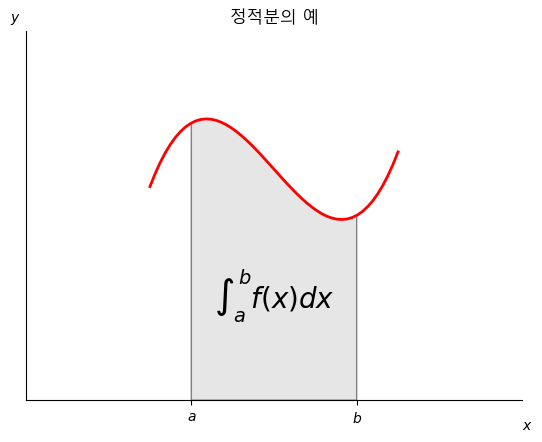

In [12]:
from matplotlib.patches import Polygon


def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6


a, b = 0, 2
x = np.linspace(a - 0.5, b + 0.5, 50)
y = f(x)

ax = plt.subplot(111)
plt.title("Ï†ïÏ†ÅÎ∂ÑÏùò Ïòà")
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(bottom=0)
ix = np.linspace(a, b)
iy = f(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.5 * (a + b), 0.2 * (f(a) + f(b)), r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])
ax.set_xlim(-2, 4)
ax.set_ylim(0, 8)
plt.show()

In [14]:
# Î∂ÄÏ†ïÏ†ÅÎ∂Ñ

F = sp.integrate(f)
F

 4         2      
x     3   x       
‚îÄ‚îÄ - x  + ‚îÄ‚îÄ + 6‚ãÖx
4         2       

In [15]:
#  FÎ•º ÎØ∏Î∂Ñ
x,y = sp.symbols('x y')
f = x**3 - 3*x**2 + x + 6
f

 3      2        
x  - 3‚ãÖx  + x + 6

In [17]:
# Ï†ïÏ†ÅÎ∂Ñ : Íµ¨Í∞ÑÏùÑ Ï£ºÍ∏∞ ÎïåÎ¨∏Ïóê Ï†Ä Î©¥Ï†ÅÏùÑ Íµ¨Ìï¥Ï§å
# Ïã¨Î≥ºÎ¶≠ Ï†ÅÎ∂Ñ - Ï†ïÌôïÌïú Ï†ÅÎ∂ÑÍ∞í
sp.integrate(f,(x,0,2))          # fÌï®ÏàòÏóêÏÑú xÎ•º Í∏∞Ï§ÄÏúºÎ°ú 0~2ÏÇ¨Ïù¥Ïùò Î©¥Ï†Å

10

In [20]:
# ÏàòÏπòÏ†ÅÎ∂Ñ - Í∑ºÏÇ¨Ï†ÅÏù∏ Ï†ÅÎ∂ÑÍ∞í
import scipy as sp
def f(x):
    return x**3 - 3*x**2 + x + 6

sp.integrate.quad(f,0,2)    #  Ï†ïÏ†ÅÎ∂Ñ(ÏàòÏπòÏ†ÅÎ∂Ñ), Í≤∞Í≥ºÍ∞íÏùò ÎëêÎ≤àÏß∏Îäî Ïò§Ï∞®Ïùò ÏÉÅÌïúÍ∞í

(10.0, 1.1102230246251565e-13)